# Molecular Dynamics

:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/4/42/Cudeposition.gif" alt="dp" style="width:30%">

Simulation of Cu atoms 

:::  

:::{figure-md} markdown-fig

![MD vs MC](./figs/mcmd.png){width=30%}

**MD vs MC:** Both sample microstates. The former follows the natural motion (dynamics); the latter samples from the Boltzmann distribution using rules designed to improve efficiency.
:::


### Timescales and Lengthscales

- Classical Molecular Dynamics can access a hiearrchy of time-scales from pico seconds to microseconds. 
- It is also possible to go beyond the time scale of brute force MD byb emplying clever enhanced sampling techniques.


:::{figure-md} markdown-fig  

<img src="./figs/md-time.png" alt="dp" style="width:40%">

Different time-scales underlying different leng-scales/motions in molecules
:::  


:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/MD_water.gif" alt="dp" style="width:30%">

Simulation of water box

:::  


### Is MD just Newton's laws applied on big systems?

**Not quite: Noble prize in Chemistry 2013**

- Classical molecular dynamics (MD) is a powerful computational technique for studying complex molecular systems.
- Applications span wide range including proteins, polymers, inorganic and organic materials. 
- Alos molecular dynamics simulation is being used in a complimentary way to the analysis of experimental data coming from NMR, IR, UV spectroscopies and elastic-scattering techniques, such as small angle scattering or diffraction.

- [2013 Noble Lectures by M Karplus, A Warshell, M Levitt](https://www.youtube.com/watch?v=NuaeD9xYBtY)

### Integrating equations of motion Numerically


- The **Euler method** is the simplest numerical integrator for ordinary differential equations (ODEs).
- More accurate integrators that include higher-order terms are known as **Runge-Kutta (RK)** methods — e.g., RK2, RK4, RK6.

- Given an ODE in standard form:

$$
\frac{d \mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y}),
$$

- we approximate the derivative using finite differences:

$$
\frac{d \mathbf{y}(t)}{dt} \approx \frac{\mathbf{y}_{n+1} - \mathbf{y}_n}{\Delta t},
$$

- leading to the **Euler update rule**:

$$
\mathbf{y}_{n+1} \approx \mathbf{y}_n + \Delta t \cdot \mathbf{f}(t_n, \mathbf{y}_n).
$$


#### Example: Harmonic Oscillator

The harmonic oscillator with parameters $m=1, k=1$ is defined by the state vector $\mathbf{y} = \begin{bmatrix} x \\ v \end{bmatrix}$ with components for $\dot{y}$ given by:

$$
\dot{x} = v, \quad \dot{v} = -x.
$$

$$
\frac{d \mathbf{y}}{dt} = \mathbf{f}(\mathbf{y}) = \begin{bmatrix} v \\ -x \end{bmatrix}.
$$

Using the Euler method, the system evolves as:

$$
\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \cdot \mathbf{f}(\mathbf{y}_n).
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y  = np.array([1.0, 1.0])  # Initial [x, v]
pos, vel = [], []
t  = 0
dt = 0.1 

for i in range(1000):
    
    dydt = np.array([y[1], -y[0]])  # [v, -x]
    y += dt * dydt                  # Euler update
    
    t += dt
    
    pos.append(y[0])
    vel.append(y[1])

# Convert to arrays
pos, vel = np.array(pos), np.array(vel)

# Plot results
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8,3))

# Phase space
ax[0].plot(pos, vel)
ax[0].set_title("Phase space (x vs v)")

# Time series
ax[1].plot(pos, label="x(t)")
ax[1].plot(vel, label="v(t)")
ax[1].legend()
ax[1].set_title("Time evolution")

# Energy
ax[2].plot(0.5*pos**2 + 0.5*vel**2)
ax[2].set_title("Energy (should be constant)")

plt.tight_layout()
plt.show()


### Verlet algortihm

Taylor expansion of position $\vec{r}(t)$ after timestep $\Delta t$ we obtain forward and backward Euler schems

$$r_{t+\Delta t} = r_t +v_t\Delta t +\frac{1}{2}a_t \Delta t^2 + O(\Delta t^3)$$

$$r_{t-\Delta t} = r_t -v_t \Delta t +\frac{1}{2}a_t \Delta t^2 + O(\Delta t^3)$$

- In 1967 Loup Verlet introduced a new algorithm into molecular dynamics simulations which preserves energy is accurate and efficient.

- Summing the two taylor expansion above we get a updating scheme which is an order of mangnitude more accurate

$$r_{t+\Delta t} = 2r_t - r_{t-\Delta t} +a_t \Delta t^2+O(\Delta t^4)$$

$$v_t = \frac{r_{t+\Delta t}-r_{t-\Delta t}}{2\Delta t} +O(\Delta t^2) $$

- Velocity is not needed to update the positions. But we still need them to set the temperature. 

- Terms of order $O(\Delta t^3)$ cancel in position giving position an accuracy of order $O(\Delta t^4)$

- To update the position we need positions in the past at two different time points! This is is not very efficient.

### Velocity Verlet updating scheme

- A better updating scheme has been proposed known as **Velocity-Verlet (VV)** which stores **positions, velocities and accelerations at the same time.** Time stepping backward expansion $r(t-\Delta t + \Delta t)$ and summing with the forward Tayloer expansions we get Velocity Verlet updating scheme:

$$v_{t+\Delta t} = v_t + \frac{1}{2}(a_t+a_{t+\Delta t})\Delta t +O(\Delta t^3)$$

- Substituting forces $a=\frac{F}{m}$ instead of acelration we get 

$$r_{t+\Delta t} = r_t + v_t\Delta t + \frac{F_t}{2m}\Delta t^2$$


$$v_{t+\Delta t} = v_t + \frac{F_t+F_{t+\Delta t}}{2m}\Delta t$$

:::{admonition} **Velocity Verlet Algorithm**  
:class: tip

**1. Evaluate the initial force from the current position:**

$$
F_t = -\frac{\partial U(r)}{\partial r} \Bigg|_{r(t)}
$$

**2. Update the position:**

$$
r_{t+\Delta t} = r_t + v_t \Delta t + \frac{F_t}{2m} \Delta t^2
$$

**3. Partially update the velocity:**

$$
v_{t+\Delta t/2} = v_t + \frac{F_t}{2m} \Delta t
$$

**4. Evaluate the force at the new position:**

$$
F_{t+\Delta t} = -\frac{\partial U(r)}{\partial r} \Bigg|_{r(t+\Delta t)}
$$

**5. Complete the velocity update:**

$$
v_{t+\Delta t} = v_{t+\Delta t/2} + \frac{F_{t+\Delta t}}{2m} \Delta t
$$

:::

### Molecular Dynamics of Classical Harmonic Oscillator (NVE)

#### Velocity Verlet integration of harmonic oscillator

In [ ]:
import numpy as np

def run_md_nve_1d(x, v, dt, t_max, en_force):
    """
    Minimalistic 1D Molecular Dynamics simulation (NVE ensemble) 
    using Velocity Verlet integration.
    Simulates a particle moving in a 1D potential without thermal noise or friction
    (i.e., energy-conserving dynamics).
    
    Parameters
    ----------
    x : float
        Initial position.
    v : float
        Initial velocity.
    dt : float
        Time step for integration.
    t_max : float
        Total simulation time.
    en_force : callable
        Function that takes position `x` as input and returns a tuple (potential energy, force).
    
    Returns
    -------
    pos : ndarray
        Array of particle positions over time.
    vel : ndarray
        Array of particle velocities over time.
    KE : ndarray
        Array of kinetic energies over time.
    PE : ndarray
        Array of potential energies over time.
    
    Example
    -------
    >>> def harmonic_force(x):
    >>>     k = 1.0
    >>>     return 0.5 * k * x**2, -k * x
    >>> pos, vel, KE, PE = run_md_nve_1d(1.0, 0.0, 0.01, 10.0, harmonic_force)
    """
    
    times, pos, vel, KE, PE = [], [], [], [], []
    
    # Initialize force and potential energy
    pe, F = en_force(x)
    
    t = 0.0
    for step in range(int(t_max / dt)):
        
        # Velocity Verlet Integration
        
        # Half-step velocity update
        v += 0.5 * F * dt
        
        # Full-step position update
        x += v * dt
        
        # Update force at new position
        pe, F = en_force(x)
        
        # Half-step velocity update
        v += 0.5 * F * dt
        
        # Save results
        times.append(t)
        pos.append(x)
        vel.append(v)
        KE.append(0.5 * v * v)
        PE.append(pe)
        
        # Advance time
        t += dt
    
    return np.array(pos), np.array(vel), np.array(KE), np.array(PE)

#### Run NVE simulation of harmonic oscillator

In [ ]:
#----parameters of simulation----
k     = 3 
x0    = 1 
v0    = 0
dt    = 0.01 * 2*np.pi/np.sqrt(k) #A good timestep determined by using oscillator frequency
t_max = 1000

### Define Potential Energy function
def ho_en_force(x, k=k):
    '''Force field of harmonic oscillator:
    returns potential energy and force'''
    
    return k*x**2, -k*x

### Run simulation
pos, vel, KE, PE = run_md_nve_1d(x0, v0, dt, t_max, ho_en_force)

# Plot results
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8,3))

# Phase space
ax[0].plot(pos, vel)
ax[0].set_title("Phase space (x vs v)")

# Time series
ax[1].plot(pos, label="x(t)")
ax[1].plot(vel, label="v(t)")
ax[1].legend()
ax[1].set_title("Time evolution")

# Energy
ax[2].plot(0.5*pos**2 + 0.5*vel**2)
ax[2].set_title("Energy (should be constant)")

plt.tight_layout()
plt.show()

#### Plot Distribution in phase-space

In [ ]:
### Visualize
fig, ax =plt.subplots(ncols=2)

ax[0].hist(pos);
ax[1].hist(vel, color='orange');
ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(v)')

fig.tight_layout()

### Ensemble averages

:::{admonition} **Ergodic hypothesis**
:class: important

$$\langle A \rangle  = \frac{1}{t} \int^{ \tau_{eq} +t}_{ \tau_{eq} }  A(t)$$

- $\tau_{eq}$ time it teks for system to "settle into" equilibrium and $t$ time of simulation. 
- Time averages are equal to ensemble averages when $t\lim \infty$. But in real life we need to determine how long to sample. 
- Ergodic assumption is: during the coruse of MD we visit all the microstates (or small but representative subset) that go into the ensemble average!
:::

:::{admonition} **Energy conservation in simulations**
:class: tip

- Kinetic, potential and total energies are flcutuation quantities in the Molecualr dynamics simulations.
- Energy in (NVE) or its average $\langle E \rangle$ (in NVT, NPT, etc) must remain constant!

$$KE_t = \sum_i \frac{p_t^2}{2m}$$

$$PE_t = \sum_{ij}u_{ij}(r_t)$$

$$\langle E \rangle = \langle KE \rangle +\langle PE \rangle \approx const $$

:::



:::{admonition} **Temperature control in simulations**
:class: tip

According to equipariting result of equilibrium statistical mechanics in the NVT ensmeble

$$\Big\langle \sum_i \frac{p_t^2}{2m} \Big\rangle =\frac{3 }{2}N  k_B T$$


$$T_t = \frac{2}{3 N k_B} \big\langle KE \big\rangle_t $$

:::

:::{admonition} **Pressure control in simulations**
:class: tip

$$P = \frac{1}{3V} \sum^N_i \Big [\frac{p^2_i}{m} +\vec{F}_i(r) \cdot \vec{r}_i(t) \Big ]$$

:::

### Langevin equation

- A particle of mass $m$ moves under the force derived from a potential energy $U(x)$. The motion is purely deterministic.

$$
m \ddot{x} = -\nabla_x U
$$

- **Challenge:** What should we do when we have only a one or few particles, and cannot explicitly simulate the vast surrounding environment in order to assign temperature?
- **Solution:** We model the surrounding medium (e.g., a solvent) as an **implicit thermal bath** that interacts with the particle.
    - The particle exchanges energy with the bath, maintaining **thermal equilibrium** at a fixed temperature $T$.
    - This motivates **Langevin dynamics**, where the effects of the solvent are captured by **friction** (dissipation) and **random thermal kicks** (fluctuations), without simulating solvent molecules explicitly.

:::{admonition} **Langevin Equation**
:class: important 

$$
m \ddot{x} = -\nabla_x U - \gamma \dot{x} + \eta(t)
$$

:::

:::{admonition} **Overdamped Limit of Langevin Dynamics ($m \ddot{x} = 0$)**
:class: important 

$$
\gamma \dot{x} = \nabla_x U + \eta(t)
$$

:::

- The friction $\gamma$ and thermal noise $\eta(t)$ are clearly connected becasue the faster the particle movies (more noise) the more it also dissipates energy. 
- the connection is known by the name of Fluctuation-Dissipation Theorem:

:::{admonition} **Fluctuation-Dissipation Theorem (FDT)**
:class: important 

$$
\langle \eta(t) \eta(t') \rangle = 2 \gamma k_B T \, \delta(t - t')
$$

:::

- The environment "forgets" what happened almost immediately after a collision very short memory hence noise terms are uncorrelated (independent). Just like what we had in brownian motion. 
- The FDT ensures that the strength of random thermal kicks is precisely tuned to the amount of viscous damping, so that the system reaches and maintains thermal equilibrium at temperature $T$
- FDT connects diffusion (random spreading) and viscosity (resistance to motion), both fundamentally controlled by temperature.

:::{admonition} **Derivation of FDT**
:class: tip, dropdown


We consider the **underdamped Langevin equation** for a free particle ($ U(x) = 0 $):

$$
m \dot{v}(t) = -\gamma v(t) + \eta(t)
$$



Here:
- $ v(t) $ is the velocity,
- $ \gamma $ is the friction coefficient,
- $ \eta(t) $ is Gaussian white noise with:

$$
\langle \eta(t) \eta(t') \rangle = C \delta(t - t')
$$

We want to compute the **steady-state** value of $ \langle v^2(t) \rangle $ and relate it to $ C $, $ \gamma $, and $ T $.


 **Step 1: Solve the Langevin Equation**

We write the equation in standard ODE form:

$$
\dot{v}(t) + \frac{\gamma}{m} v(t) = \frac{1}{m} \eta(t)
$$

This is a **linear inhomogeneous ODE**, solvable by integrating factor:

$$
v(t) = v(0) e^{-\gamma t / m} + \frac{1}{m} \int_0^t e^{-\gamma (t - s) / m} \eta(s) \, ds
$$



**Step 2: Compute $ \langle v^2(t) \rangle $**

We take the expectation:

$$
\langle v^2(t) \rangle
= \left\langle \left[ v(0) e^{-\gamma t / m} + \frac{1}{m} \int_0^t e^{-\gamma (t - s)/m} \eta(s) \, ds \right]^2 \right\rangle
$$

This expands to:

$$
\langle v^2(t) \rangle
= v^2(0) e^{-2\gamma t / m}
+ \frac{2 v(0) e^{-\gamma t / m}}{m} \left\langle \int_0^t e^{-\gamma (t - s)/m} \eta(s) \, ds \right\rangle
+ \frac{1}{m^2} \left\langle \left( \int_0^t e^{-\gamma (t - s)/m} \eta(s) \, ds \right)^2 \right\rangle
$$


- The second term is zero since $ \langle \eta(s) \rangle = 0 $,
- For the third term, use the noise correlation:

$$
\left\langle \left( \int_0^t e^{-\gamma (t - s)/m} \eta(s) \, ds \right)^2 \right\rangle
= \int_0^t \int_0^t e^{-\gamma (2t - s - s')/m} \langle \eta(s) \eta(s') \rangle \, ds \, ds'
= C \int_0^t e^{-2\gamma (t - s)/m} \, ds
$$

Change variable: $ u = t - s \Rightarrow du = -ds $

$$
= C \int_0^t e^{-2\gamma (t - s)/m} \, ds
= C \int_0^t e^{-2\gamma u/m} \, du
= \frac{C m}{2\gamma} \left( 1 - e^{-2\gamma t/m} \right)
$$

So the full result is:

$$
\langle v^2(t) \rangle = v^2(0) e^{-2\gamma t/m} + \frac{C}{2 m \gamma} \left( 1 - e^{-2\gamma t/m} \right)
$$



**Long-Time Limit**

As $ t \to \infty $, the exponential terms vanish:

$$
\boxed{ \langle v^2 \rangle = \lim_{t \to \infty} \langle v^2(t) \rangle = \frac{C}{2 m \gamma} }
$$


**Apply Equipartition**

At thermal equilibrium, equipartition gives:

$$
\left\langle \frac{1}{2} m v^2 \right\rangle = \frac{1}{2} k_B T
\quad \Rightarrow \quad
\langle v^2 \rangle = \frac{k_B T}{m}
$$

Matching with the derived expression:

$$
\frac{C}{2 m \gamma} = \frac{k_B T}{m}
\quad \Rightarrow \quad
C = 2 \gamma k_B T
$$

$$
\boxed{ \langle \eta(t) \eta(t') \rangle = 2 \gamma k_B T \, \delta(t-t') }
$$

:::

### Molecualr Dynamics of Harmonic oscillator (NVT)

- Our goal is to Numerically solve the **Langevin equation**:

$$
m \ddot{x} = -\nabla V(x) - \gamma \dot{x} + \sqrt{2\gamma k_BT} \, \eta(t),
$$

- The target is to sample the **canonical distribution**:

$$
P(x, v) \propto \exp\left( -\beta \left( \frac{1}{2} m v^2 + V(x) \right) \right).
$$

- There are many ways of simulating langevin. Simplest is to use Euler method just like we did for diffusion.
- Here we will use **BAOAB** scheme which splits the Langevin evolution operator into three pieces:
  - **B**: Free drift in position ($x$ evolution under $v$).
  - **A**: Velocity change under conservative force $F = -\nabla V(x)$.
  - **O**: Stochastic process (friction + random kicks in $v$).

- Thus, **BAOAB** updates **position and velocity** via a **B → A → O → A → B** sequence at each timestep $\Delta t$.

| Feature | Explanation |
|:--------|:------------|
| Stability | Handles both large and small friction $\gamma$ robustly |
| Accuracy | Samples correct Boltzmann distribution up to $\mathcal{O}(\Delta t^2)$ errors |
| Efficiency | Large stable timesteps allowed compared to naive Euler schemes |
| Universality | Reduces to velocity Verlet (Hamiltonian MD) if $\gamma=0$ and to overdamped Langevin if $\gamma \to \infty$ |

:::{admonition} **BAOAB scheme**
:class: tip, dropdown

1. **B: Drift half-step in position**

   $$
   x \to x + \frac{\Delta t}{2} v
   $$

2. **A: Kick velocity half-step using force**

   $$
   v \to v + \frac{\Delta t}{2m} F(x)
   $$

3. **O: Apply stochastic friction and noise to velocity**

   $$
   v \to e^{-\gamma \Delta t} v + \sqrt{k_B T (1 - e^{-2\gamma \Delta t})/m} \, R,
   $$
   where $R$ is a standard normal random number.

4. **A: Kick velocity half-step again**

   $$
   v \to v + \frac{\Delta t}{2m} F(x)
   $$

5. **B: Drift half-step in position**

   $$
   x \to x + \frac{\Delta t}{2} v
   $$

:::

In [197]:
def langevin_md_1d(x, v, dt, kBT, gamma, t_max, en_force):
    '''Langevin dynamics applied to 1D potentials
    Using integration scheme known as BA-O-AB.
    INPUT: Any 1D function with its parameters
    '''
    
    times, pos, vel, KE, PE  = [], [], [], [], []
    
    t = 0  
    for step in range(int(t_max/dt)):
        
        #B-step
        pe, F = en_force(x)
        v    += F*dt/2
        
        #A-step
        x += v*dt/2

        #O-step
        v = v*np.exp(-gamma*dt) + np.sqrt(1-np.exp(-2*gamma*dt)) * np.sqrt(kBT) * np.random.normal()
        
        #A-step
        x +=  v*dt/2
        
        #B-step
        pe, F = en_force(x)
        v    +=  F*dt/2
        
        ### Save output 
        times.append(t), pos.append(x), vel.append(v), KE.append(0.5*v*v), PE.append(pe)    
    
    return np.array(times), np.array(pos), np.array(vel), np.array(KE), np.array(PE)
     

#### Run lagevin dynamics of 1d harmonic oscillator

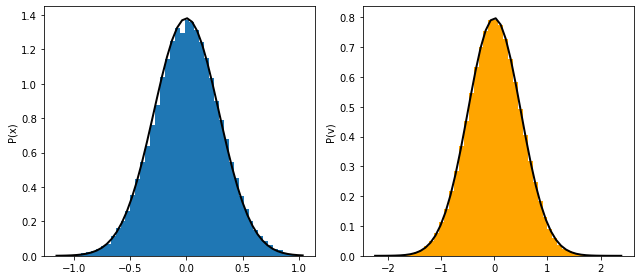

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x0 = 0.0
v0 = 0.5

# Input parameters
kBT   = 0.25
gamma = 0.01
dt    = 0.01
t_max = 10000
freq  = 10
k     = (2 * np.pi * freq)**2  # Spring constant (harmonic oscillator)

### Define Potential: Energy and Force
def ho_en_force(x, k=k):
    energy = 0.5 * k * x**2
    force  = -k * x
    return energy, force

### Langevin dynamics (assuming you have this function correctly defined)
# Should return arrays: times, pos, vel, KE, PE
times, pos, vel, KE, PE = langevin_md_1d(x0, v0, dt, kBT, gamma, t_max, ho_en_force)

### Plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))

bins = 50

# Theoretical distributions
def gaussian_x(x, k, kBT):
    return np.exp(-k*x**2/(2*kBT)) / np.sqrt(2*np.pi*kBT/k)

def gaussian_v(v, kBT):
    return np.exp(-v**2/(2*kBT)) / np.sqrt(2*np.pi*kBT)

# Plot histograms
ax[0].hist(pos, bins=bins, density=True, alpha=0.6, color='skyblue')
ax[1].hist(vel, bins=bins, density=True, alpha=0.6, color='salmon')

# Plot theoretical curves
x_grid = np.linspace(min(pos), max(pos), 300)
v_grid = np.linspace(min(vel), max(vel), 300)

ax[0].plot(x_grid, gaussian_x(x_grid, k, kBT), 'k-', lw=2, label='Theory')
ax[0].set_xlabel('Position x')
ax[0].set_ylabel('P(x)')
ax[0].legend()


ax[1].plot(v_grid, gaussian_v(v_grid, kBT), 'k-', lw=2, label='Theory')
ax[1].set_xlabel('Velocity v')
ax[1].set_ylabel('P(v)')
ax[1].legend()

ax[2].plot(pos[-1000:], vel[-1000:], alpha=0.3)
ax[2].set_xlabel('Position x')
ax[2].set_ylabel('Velocity v')
ax[2].set_title('Phase Space')

E_tot=KE+PE
ax[3].plot(E_tot)
ax[3].set_xlabel('Time')
ax[3].set_ylabel('Energy')
ax[3].set_title('Total Energy')

fig.tight_layout()
plt.show()


### Double well potential

In [206]:
def double_well(x, k=1, a=3):
    
    energy = 0.25*k*((x-a)**2) * ((x+a)**2)
    force = -k*x*(x-a)*(x+a)
    
    return energy, force
 
x = np.linspace(-6,6,1000)
energy, force = double_well(x) 

plt.plot(x, energy, '-o',lw=3)
plt.plot(x, force, '-', lw=3, alpha=0.5)

plt.ylim(-20,40)
plt.grid(True)
plt.legend(['$U(x)$', '$F=-\partial_x U(x)$'], fontsize=15)

interactive(children=(FloatSlider(value=1.0, description='k', max=1.0, min=0.1), FloatSlider(value=3.0, descri…

In [207]:
# Potential 
def double_well(x, k=1, a=3):
    
    energy = 0.25*k*((x-a)**2) * ((x+a)**2)
    force = -k*x*(x-a)*(x+a)
    
    return energy, force

# Ininital conditions
x     = 0.1
v     = 0.5

# Input parameters of simulation
kBT   = 5 # vary this
gamma = 0.1 # vary this
dt    = 0.05
t_max = 10000
freq  = 10

#### Run the simulation
times, pos, vel, KE, PE = langevin_md_1d(x, v, dt, kBT, gamma, t_max, double_well)

#### Plotting 
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(13,5))

x = np.linspace(min(pos), max(pos), 50)

ax[0].plot(pos)
ax[1].hist(pos, bins=50, density=True, alpha=0.5);

v = np.linspace(min(vel), max(vel),50)

ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')

ax[1].set_xlabel('Computed P(x)')
ax[1].set_ylabel('x')

### Additional resoruces for learning MD

- [Goran Wahnstrom's MD and MC lectures](http://fy.chalmers.se/~tfsgw/CompPhys/)
- [Online course materials: **principles of modern molecular simulation methods**](https://sites.engineering.ucsb.edu/~shell/che210d/assignments.html)
- ["Understanding Molecular Simulation: From Algorithms to Applications" a book by Daan Frankel](https://www.elsevier.com/books/understanding-molecular-simulation/frenkel/978-0-12-267351-1)

### Problems

#### 1D potential

- In molecular simulations, we often want to sample from the **Boltzmann distribution** $P(x) \propto e^{-V(x)/k_BT}$. 
- Langevin dynamics enables us to do this by modeling the effects of both **deterministic forces** (from the potential) and **random thermal fluctuations**.
- Write a Python function using NumPy to simulate a 1D system under Langevin dynamics for the following potential:

$$
V(x) = Ax^2 + Bx^3 + Cx^4
$$

You should:

1. Implement Langevin dynamics to evolve position and velocity over time.
2. Allow inputs for:
   - Coefficients A, B, C
   - Initial position and velocity
   - Time step `dt`, number of steps
   - Temperature `kBT` and friction coefficient `gamma`
3. Store all positions and plot a **normalized histogram** (probability density) after the simulation.
4. Try the following setups:
   - **Double well**: A = -1, B = 0, C = 1
   - **Asymmetric well**: A = -1, B = -1, C = 1
   - Vary initial positions and explain what changes


5. Compare your histograms with $e^{-V(x)/k_BT}$. Do they match?
6.  What happens if `gamma` is very small? What about very large?